<a href="https://colab.research.google.com/github/paulbundi/Project/blob/main/IMS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iris Data Set Classification

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a **linear discriminant model** to distinguish the species from each other.

[Source]( https://en.wikipedia.org/wiki/Iris_flower_data_set)

Linear Discriminant Analysis (LDA) is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or more commonly, for dimensionality reduction before later classification.
LDA is closely related to analysis of variance (ANOVA) and regression analysis, which also attempt to express one dependent variable as a linear combination of other features or measurements1.

[Parts of a flower]( https://static.packt-cdn.com/products/9781789539462/graphics/9cede6e3-0932-430a-a17e-d30025eb2b02.png)

In [ ]:
# Importing the data set
from sklearn.datasets import load_iris

# Load the Iris dataset
iris= load_iris()
# print(iris)

#Creating Scatter Plots
*  flower_array = [0, 1, 2, 3] where a=Sepal length, b=Sepal width, c=Petal length, d=Petal width.

*   [Plotting library of choice](https://matplotlib.org/stable/gallery/index.html)







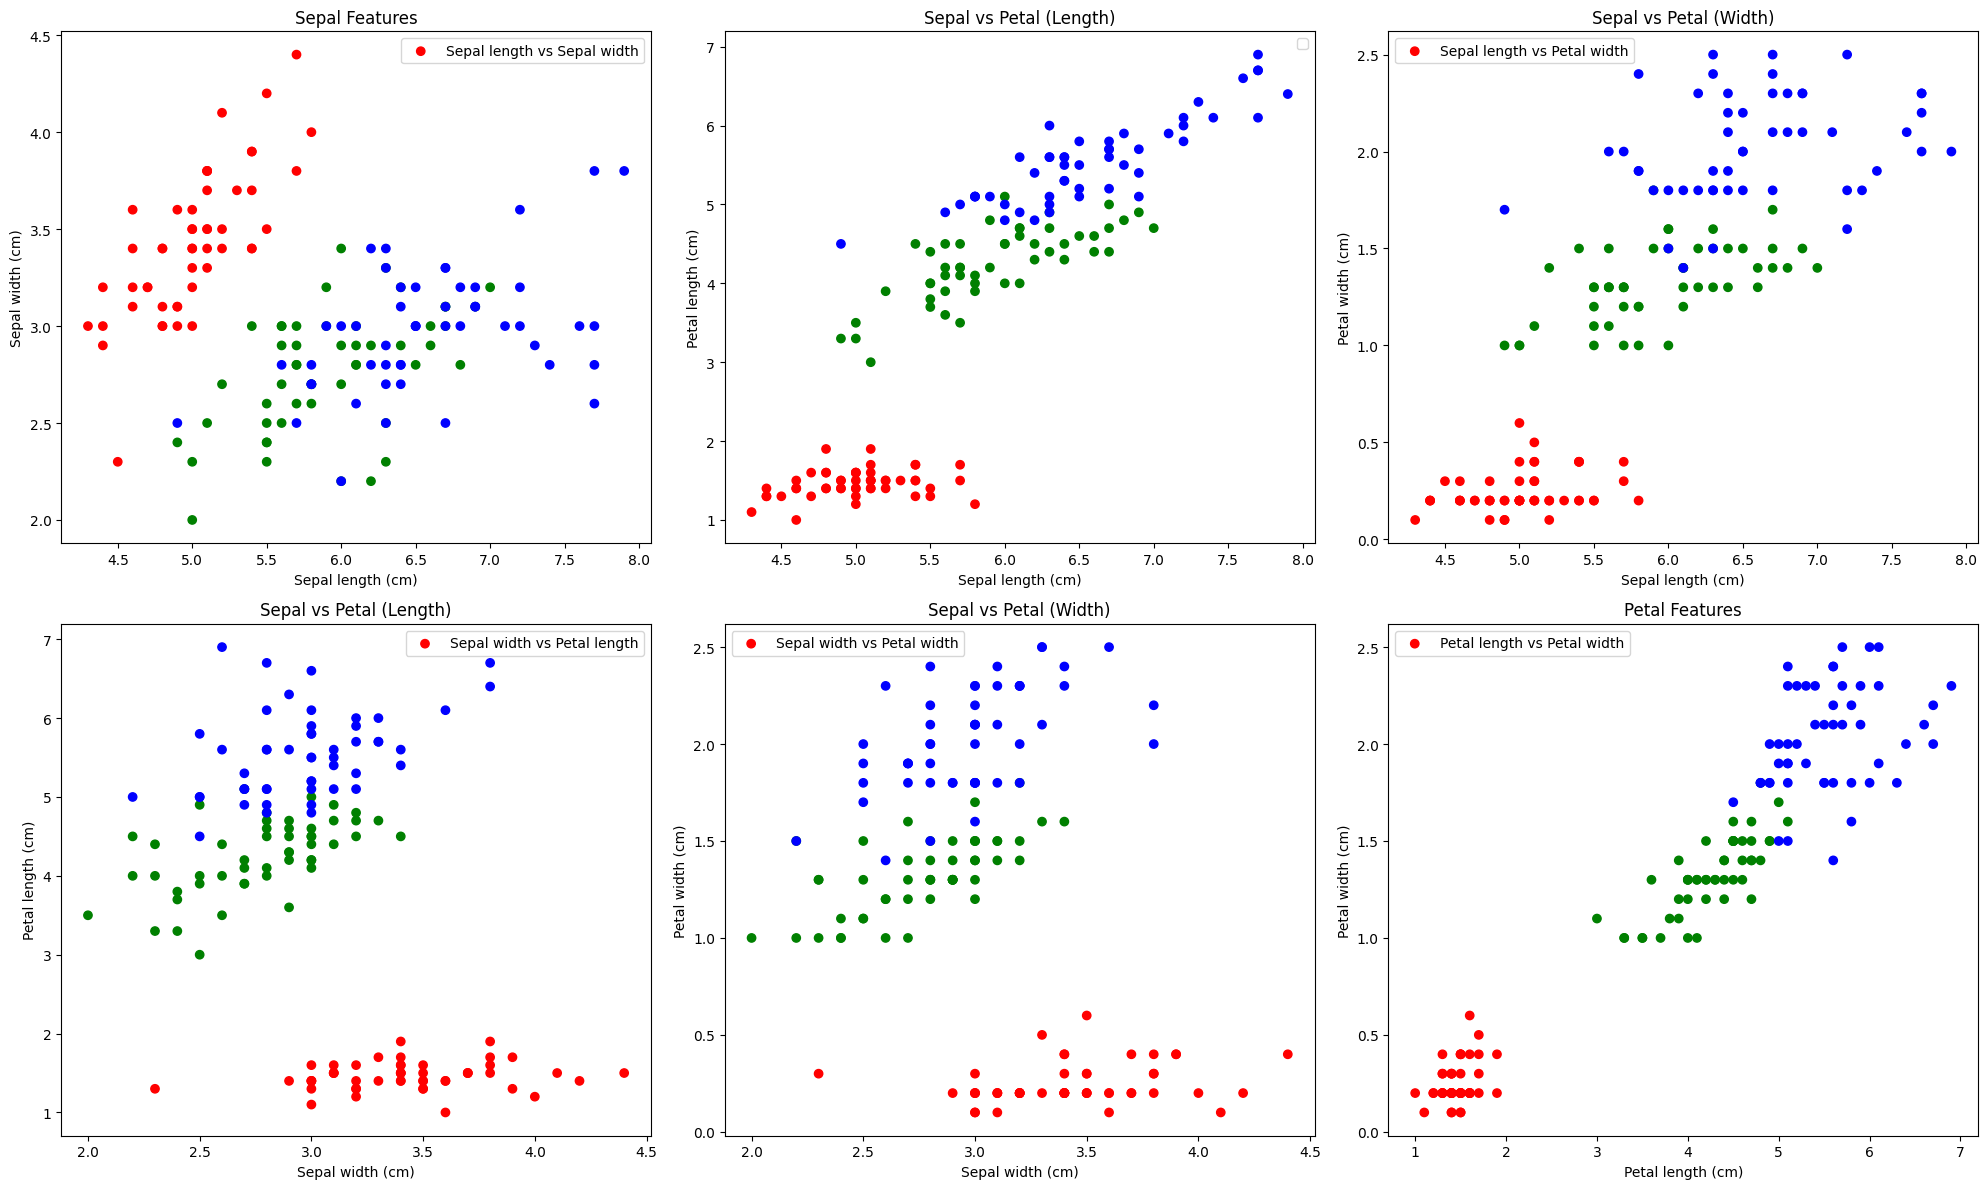

In [5]:
import matplotlib.pyplot as plt
# Separate features (X) and target labels (y)
iris_data = iris.data
iris_type = iris.target

# Define colors based on species labels
plot_colors = ['red' if flower_type == 0 else 'green' if flower_type == 1 else 'blue' for flower_type in iris_type]
# [red = 'setosa', green='versicolor', blue='virginica']
# print(plot_colors)

# Create scatter plots for each feature combination
plt.figure(figsize=(20, 12))

# The first argument 2 is the number of rows in the figure.
# The second argument 3 is the number of columns in the figure.
# The third argument 1 is the index of the current plot.
plt.subplot(2, 3, 1)
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=plot_colors, label='Sepal length vs Sepal width')  # iris_data[:, n] selects all elements from the first column where n is a column
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal Features')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(iris_data[:, 0], iris_data[:, 2], c=plot_colors)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal vs Petal (Length)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(iris_data[:, 0], iris_data[:, 3], c=plot_colors, label='Sepal length vs Petal width')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal vs Petal (Width)')
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(iris_data[:, 1], iris_data[:, 2], c=plot_colors, label='Sepal width vs Petal length')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal length (cm)')
plt.title('Sepal vs Petal (Length)')
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(iris_data[:, 1], iris_data[:, 3], c=plot_colors, label='Sepal width vs Petal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal vs Petal (Width)')
plt.legend()

plt.subplot(2, 3, 6)
plt.scatter(iris_data[:, 2], iris_data[:, 3], c=plot_colors, label='Petal length vs Petal width')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal Features')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Why Logistic Regression?
Logistic regression predicts whether something is True of False instead of predicting something continous like size. A logistic S function is drawn is drawn and goes from 0 to 1 and it is well suited for classification problems.

Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets. 80% to train and the remaining to test
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_type, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(multi_class='ovr', solver='lbfgs')

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_regression.predict(X_test)


In [10]:
# Evaluate model accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Model Accuracy: 0.9667


In [11]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Get the iris dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [9]:
# Predict the species of a new flower (example)
unknown_flower = [6.1,2.8,4.0,1.3]  # Sepal length, Sepal width, Petal length, Petal width
predicted_species = logistic_regression.predict([unknown_flower])[0]
species_names = iris.target_names

print(f"Predicted species: {species_names[predicted_species]}")

Predicted species: versicolor
